In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("HR_comma_sep.csv.txt")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
df_1 = df.copy()

In [7]:

df_1 = pd.get_dummies(df_1, columns=['sales', 'salary'], drop_first=True)

In [9]:
df_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [10]:
import matplotlib.pyplot as plt

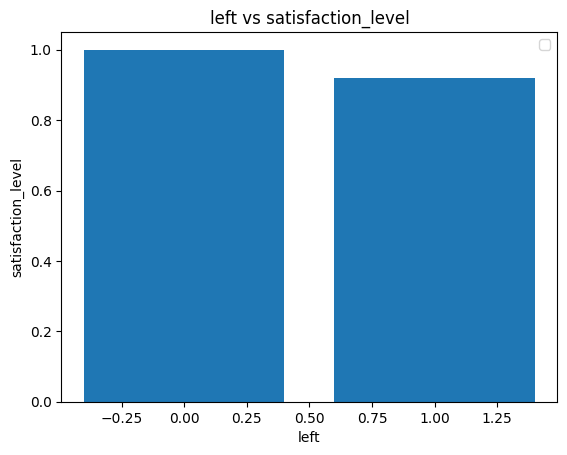

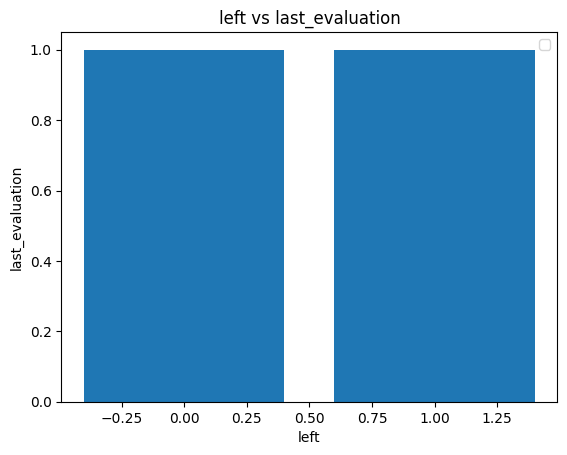

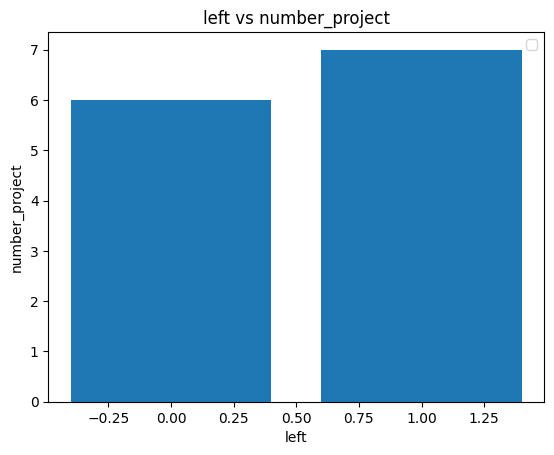

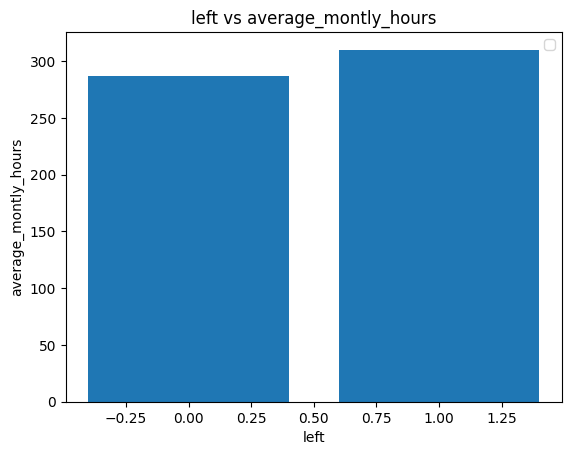

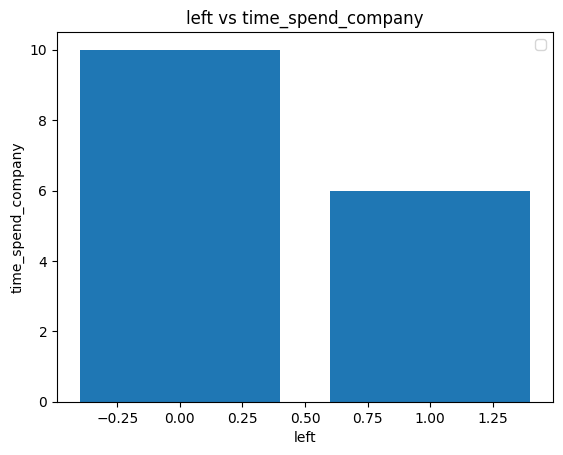

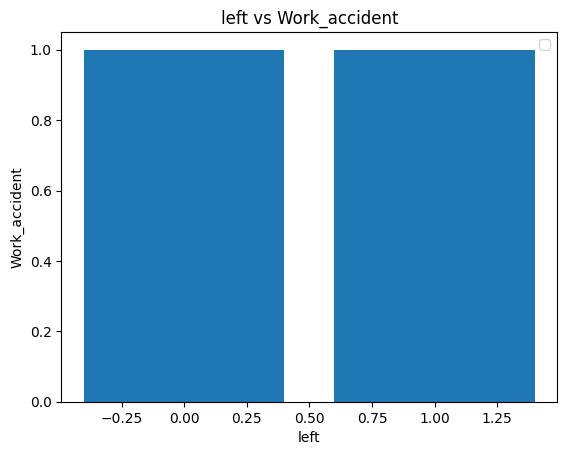

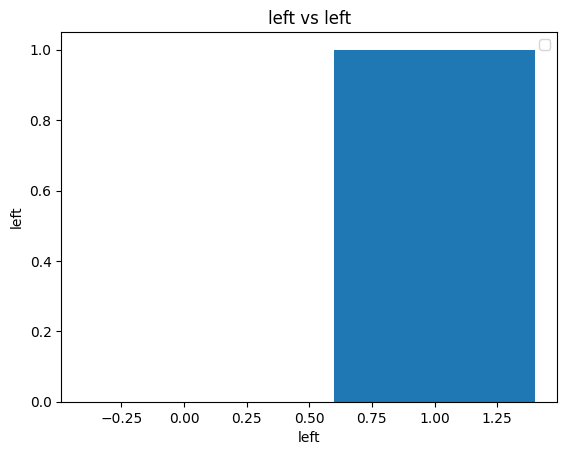

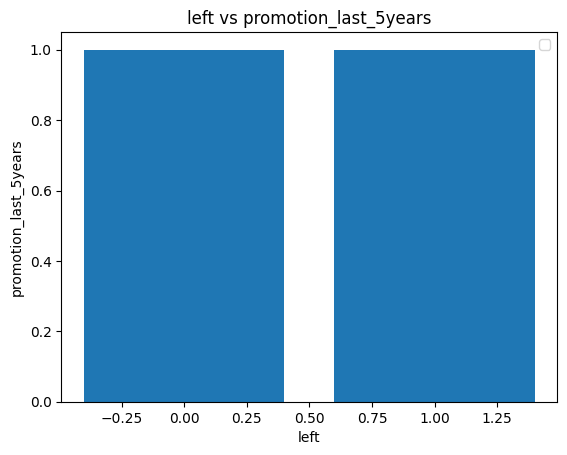

In [22]:

for y_col in df.columns[:8]:

    figure = plt.figure
    ax = plt.gca()
    ax.bar(df["left"], df[y_col])
    ax.set_xlabel("left")
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format("left",y_col))

    plt.legend()
    plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:

X = df_1.drop('left', axis=1)
y = df_1['left']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.794

In [26]:
pred = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,mean_absolute_error

In [28]:
me = mean_absolute_error(y_test,pred)
me

0.206

In [29]:
cm = confusion_matrix(y_test,pred)

Text(50.722222222222214, 0.5, 'Predicted')

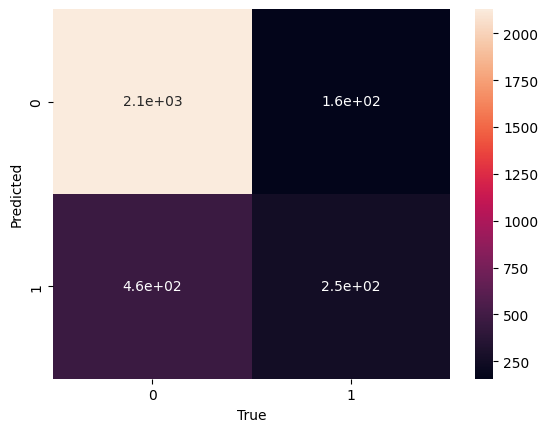

In [30]:
import seaborn as sns

sns.heatmap(cm,annot=True)
plt.xlabel("True")
plt.ylabel("Predicted")